In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

# install bagpy, pyyaml, and rosbag_pandas
import rosbag_pandas

%load_ext autoreload
%autoreload 2

In [2]:
bag_file = "/home/emil/temp/rfsdata/2022_08_12_10_21_39/data.bag"  # do square at 10 m and hower at source position
bag_file = "/home/emil/temp/rfsdata/2022_08_12_10_36_11/data.bag"  # square@13m with minor hickups (probably hover)
bag_file = "/home/emil/temp/rfsdata/2022_08_12_12_42_38/data.bag"  # 2 cross dips @7m, 1X m square, initial misjudgemnt on src position
bag_file = "/home/emil/temp/rfsdata/2022_08_12_13_07_11/data.bag"  # square@15 m, no src reaction behaviour
bag_file = "/home/emil/temp/rfsdata/2022_08_12_13_14_13/data.bag"  # do square, no source detected (rosbridge was down)
bag_file = "/home/emil/temp/rfsdata/2022_08_12_13_22_43/data.bag"  # just noise at start position, no takeoff
bag_file = "/home/emil/temp/rfsdata/2022_08_12_13_24_47/data_repaired.bag"  # square, no source detected (rosbridge was down)
bag_file = "/home/emil/temp/rfsdata/2022_08_12_13_33_21/data.bag"  # two cross dips during the square
bag_file = "/home/emil/temp/rfsdata/2022_08_12_13_43_24/data_repaired.bag"  # 2 cross dips @7m, 13 m square
bag_file = "/home/emil/temp/rfsdata/2022_08_12_14_02_57/data.bag"  # search square reverse (clockwise), 1 cross dip@7m
bag_file = "/home/emil/temp/rfsdata/2022_08_12_14_10_14/data.bag"  # search square reverse (clockwise), 2 cross dips@7m
bag_file = "/home/emil/temp/rfsdata/2022_08_12_14_21_56/data_repaired.bag"  # supposed to be source localization, but broken before it's finished
df = rosbag_pandas.bag_to_dataframe(bag_file)

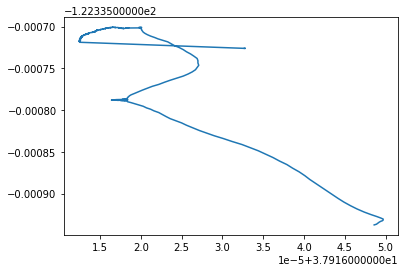

In [3]:
plt.plot(
    df["/mavros/global_position/raw/fix/latitude"].dropna(),
    df["/mavros/global_position/raw/fix/longitude"].dropna(),
)

In [4]:
df2 = df[
    [
        "/mavros/global_position/local/pose/pose/position/x",
        "/mavros/global_position/local/pose/pose/position/y",
        "/mavros/global_position/local/pose/pose/position/z",
    ]
].dropna()  # , 'count_vs_time']].dropna()
df2.rename(
    columns={
        "/mavros/global_position/local/pose/pose/position/x": "x",
        "/mavros/global_position/local/pose/pose/position/y": "y",
        "/mavros/global_position/local/pose/pose/position/z": "z",
    },
    inplace=True,
)
# 'count_vs_time':'counts'}, inplace=True)
df2 = df2.query(f"x < 1000 & y < 1000 & z < 1000")

dfglob = df[
    [
        "/mavros/global_position/raw/fix/latitude",
        "/mavros/global_position/raw/fix/longitude",
    ]
].dropna()
dfglob.rename(
    columns={
        "/mavros/global_position/raw/fix/latitude": "lat",
        "/mavros/global_position/raw/fix/longitude": "lon",
    },
    inplace=True,
)

In [44]:
df2["lat"] = dfglob.iloc[1:].lat.values
df2["lon"] = dfglob.iloc[1:].lon.values

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(5, 5), dpi=140)
maxind = 1500
axs[0].plot(dfglob.iloc[:maxind]["lon"], dfglob.iloc[:maxind]["lat"])
axs[1].plot(df2.iloc[:maxind]["x"], df2.iloc[:maxind]["y"])
scatter_id = 1300
offset = 4
axs[0].scatter(
    dfglob.iloc[scatter_id + offset]["lon"],
    dfglob.iloc[scatter_id + offset]["lat"],
    c="r",
)
axs[1].scatter(df2.iloc[scatter_id]["x"], df2.iloc[scatter_id]["y"], c="r")
axs[0].set_title("Global Position")
axs[1].set_title("Local Position")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=140)
ax.plot(df2.lon, df2.lat)
# get current axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zoom_scaler = 40
xlim = [
    xlim[0] - (xlim[1] - xlim[0]) * zoom_scaler,
    xlim[1] + (xlim[1] - xlim[0]) * zoom_scaler,
]
ylim = [
    ylim[0] - (ylim[1] - ylim[0]) * zoom_scaler,
    ylim[1] + (ylim[1] - ylim[0]) * zoom_scaler,
]
# set new limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ctx.add_basemap(
    ax,
    source=ctx.providers.Esri.WorldShadedRelief,
    crs="EPSG:4326",
    attribution=False,
    zoom=13,
)

In [ ]:
# make notebook plot interactable
%matplotlib widget
# plot a 3D line
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(df2.x, df2.y, df2.z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

In [ ]:
%matplotlib widget


def shiftline(df, nparts=100):
    colors = plt.cm.viridis(np.linspace(0, 1, nparts))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    n = round(len(df) / nparts)
    for i in range(nparts):
        ax.plot(
            df.iloc[i * n : (i + 1) * n + 1].x,
            df.iloc[i * n : (i + 1) * n + 1].y,
            df.iloc[i * n : (i + 1) * n + 1].z,
            color=colors[i],
        )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return fig, ax

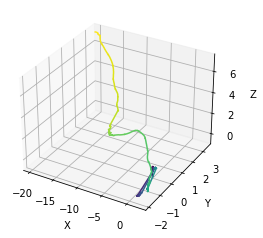

In [50]:
def shiftline(df, nparts=100):
    colors = plt.cm.viridis(np.linspace(0, 1, nparts))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    n = round(len(df) / nparts)
    for i in range(nparts):
        ax.plot(
            df.iloc[i * n : (i + 1) * n + 1].x,
            df.iloc[i * n : (i + 1) * n + 1].y,
            df.iloc[i * n : (i + 1) * n + 1].z,
            color=colors[i],
        )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return fig, ax


fig, ax = shiftline(df2, nparts=100)


def shiftline2d(df, nparts=100):
    colors = plt.cm.viridis(np.linspace(0, 1, nparts))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    n = round(len(df) / nparts)
    for i in range(nparts):
        ax.plot(
            df.iloc[i * n : (i + 1) * n + 1].x,
            df.iloc[i * n : (i + 1) * n + 1].y,
            color=colors[i],
        )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    return fig, ax


def shiftlinell(df, nparts=100):
    colors = plt.cm.viridis(np.linspace(0, 1, nparts))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    n = round(len(df) / nparts)
    for i in range(nparts):
        ax.plot(
            df.iloc[i * n : (i + 1) * n + 1].lon,
            df.iloc[i * n : (i + 1) * n + 1].lat,
            df.iloc[i * n : (i + 1) * n + 1].z,
            color=colors[i],
        )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return fig, ax


def shiftline2dll(df, nparts=100):
    colors = plt.cm.viridis(np.linspace(0, 1, nparts))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    n = round(len(df) / nparts)
    for i in range(nparts):
        ax.plot(
            df.iloc[i * n : (i + 1) * n + 1].lon,
            df.iloc[i * n : (i + 1) * n + 1].lat,
            color=colors[i],
        )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    return fig, ax


# plt.plot(df2.iloc[:to].x, df2.iloc[:to].y)
# plt.xlim([-1,2])
# plt.ylim([-3,1])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='X', ylabel='Y'>)

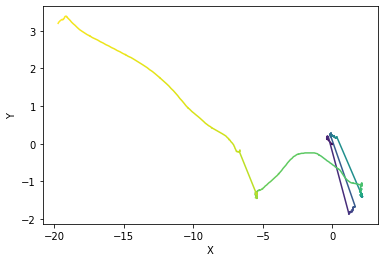

In [60]:
shiftline2d(df2.iloc[:], nparts=100)
# plt.xlim([-1,2])
# plt.ylim([-3,1])

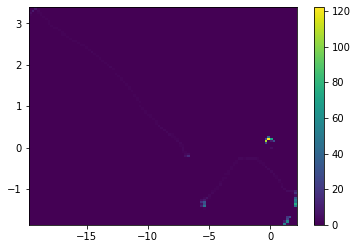

In [38]:
res = plt.hist2d(df2.x, df2.y, bins=100, cmap="viridis")
plt.colorbar()

In [42]:
def busiest_x_y(df, return_idx=False):
    """Returns the x, y of the most trafficated point"""
    counts, bins_x, bins_y = np.histogram2d(df.x, df.y, bins=200)
    center_x = (bins_x[:-1] + bins_x[1:]) / 2
    center_y = (bins_y[:-1] + bins_y[1:]) / 2
    ix, iy = np.unravel_index(counts.argmax(), counts.shape)
    if return_idx:
        return ix, iy, counts.max()
    else:
        return center_x[ix], center_y[iy], counts.max()


busiest_x_y(df2)

(-0.07841468621506209, 0.22219369624292096, 90.0)

In [ ]:
import contextily as ctx

%matplotlib inline

ctx.Place("Tokyo")  # , zoom=10)

In [81]:
# load matlab .mat file
import scipy.io

mat = scipy.io.loadmat("/home/emil/Downloads/2022-08-12 14-10-00.tlog.mat")
# grep from keys
for k in mat.keys():
    if "gps" and "lon" in k:
        print(k)
# get gps data
lon = mat["lon_mavlink_gps2_raw_t"]
lat = mat["lat_mavlink_gps2_raw_t"]

lon_mavlink_gps_raw_int_t
param3_mavlink_command_long_t
param4_mavlink_command_long_t
lon_mavlink_global_position_int_t
lon_mavlink_gps2_raw_t
target_system_mavlink_command_long_t
param7_mavlink_command_long_t
longitude_mavlink_home_position_t
lon_mavlink_terrain_report_t
lon_int_mavlink_position_target_global_int_t
param1_mavlink_command_long_t
target_component_mavlink_command_long_t
param5_mavlink_command_long_t
param2_mavlink_command_long_t
confirmation_mavlink_command_long_t
param6_mavlink_command_long_t
command_mavlink_command_long_t
longitude_mavlink_gps_global_origin_t


In [87]:
mat["longitude_mavlink_gps_global_origin_t"][0][1] / 1e7

-122.335742

In [92]:
lon = np.array(lon)[:, 1] / 1e7
lat = np.array(lat)[:, 1] / 1e7

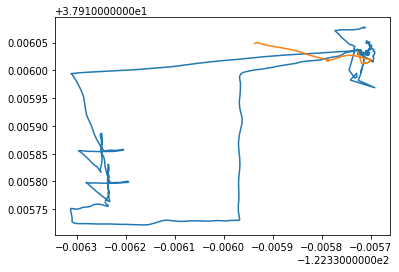

In [94]:
plt.plot(lon, lat)
plt.plot(df2.lon, df2.lat)